In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dataframe_image as dfi
import collections
from collections import Counter
from itertools import chain
import csv
from scipy import stats
import statsmodels.api as sm
from pandas.api.types import is_numeric_dtype


#Opening bank
filename = '/home/valentina/SOFKA_CODIGO/words_bank.csv'
with open(filename, 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    text = list(csv_reader)

#Converting our words bank into pandas dataframe
df =pd.read_csv('/home/valentina/SOFKA_CODIGO/words_bank.csv', names=['Words'], header=None)

In [112]:

#Count consonants
def countConsonants(string):
    num_consonants = 0
    # to count the consonants
    for char in string:
        if char not in "aeiouAEIOU ":
            num_consonants += 1
    return num_consonants

#Count vowels
def countVowels(string):
    num_vowels = 0
    # to count the consonants
    for char in string:
        if char in "aeiouAEIOU ":
            num_vowels += 1
    return num_vowels

#Normal distribution testing
#null hypothesis: x comes from a normal distribution
def normal_test(df):
    
    for i in df.columns:
        if is_numeric_dtype(df[i]):
            k2, p = stats.normaltest(df[i])
            alpha = 0.05
            if p < alpha:
                print("The null hypothesis can be rejected")
                
            else:
                print("The null hypothesis cannot be rejected")




In [113]:
#Getting length, consonants and vowels info
df['Length']=df['Words'].str.len()
df['Consonants'] = df['Words'].apply(countConsonants)
df['Vowels'] = df['Words'].apply(countVowels)
df_short=df[['Length', 'Consonants', 'Vowels']]

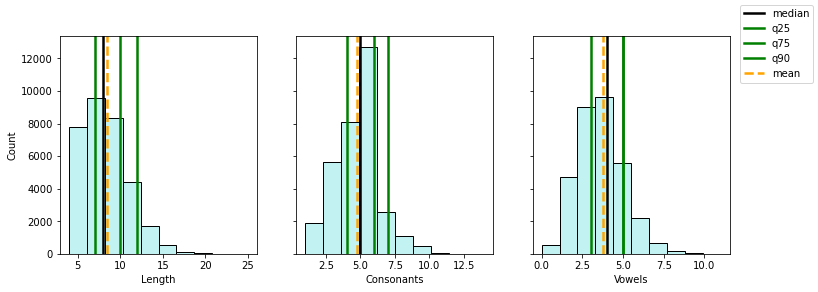

In [114]:

#Plotting histograms
fig, ax = plt.subplots(nrows = 1, ncols =3, figsize=(12,4), sharey=True)

for pos,cols in enumerate(df_short.columns):
    sns.histplot(data=df_short, x=cols, bins=10, ax = ax[pos], color='paleturquoise')
    ax[pos].axvline(x=df[cols].median(), c='k', ls='-', lw=2.5, label = 'median')
    ax[pos].axvline(x=df[cols].quantile(0.25), c='green', ls='-', lw=2.5, label = 'q25')
    ax[pos].axvline(x=df[cols].quantile(0.75), c='green', ls='-', lw=2.5, label = 'q75')
    ax[pos].axvline(x=df[cols].quantile(0.90), c='green', ls='-', lw=2.5, label = 'q90')
    ax[pos].axvline(x=df[cols].mean(), c='orange', ls='--', lw=2.5, label = 'mean')
    
    if pos == 0:
        fig.legend()
        #plt.title('hi')
        

plt.savefig('hist_words.png')

In [115]:
#Testing whether our data is normal or not.
normal_test(df_short)

The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected


Our lenght, vowels and consonants numbers does not follow a normal distribution

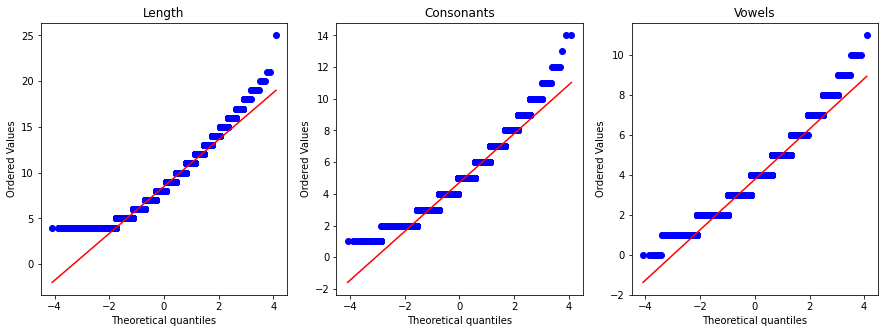

In [116]:
#Q-Q PLOT
fig, ax = plt.subplots(nrows = 1, ncols =3, figsize=(15,5))
for pos,cols in enumerate(df_short):
   
   stats.probplot(df[cols], fit=True, plot=ax[pos])
   ax[pos].set_title(str(cols))

In [117]:
#Getting the letter-position dataFrame
letters=[]
position=[]

# For each word in the list of accepted words
for word in (df['Words']):
    
    # Convert the words to it's letter-position format
    for pos, letter in enumerate(word):
        letters.append(letter)
        position.append(pos)
        word_each.append(word)

df_letters_position = pd.DataFrame(list(zip(letters, position)),
               columns =['Letter', 'Position']).sort_values(by='Letter')



In [118]:
df_letters_position

,Letter,Position
276149,a,6
187695,a,11
187692,a,8
187683,a,7
187681,a,5
...,...,...
141707,ñ,4
105318,ñ,4
12870,ñ,2
135154,ñ,3


In [119]:
#DataFrame of vowels and consonants position

df_position_vocals = df_letters_position[(df_letters_position['Letter'] =='a')|(df_letters_position['Letter'] =='e')|(df_letters_position['Letter'] =='i')| (df_letters_position['Letter'] =='o')|(df_letters_position['Letter'] =='u')]
df_position_consonants = df_letters_position[(df_letters_position['Letter'] !='a')&(df_letters_position['Letter'] !='e')&(df_letters_position['Letter'] !='i')& (df_letters_position['Letter'] !='o')&(df_letters_position['Letter'] !='u')]

In [120]:
#Getting each-letter df
df = {}

for pos, name in enumerate(df_letters_position['Letter'].unique()):

    letters = df_letters_position['Letter'].unique()
    df[name] = df_letters_position.loc[df_letters_position['Letter'] == letters[pos]]

In [121]:
#Are our data normal?
for i in df.keys():
     normal_test(df[i])

The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected


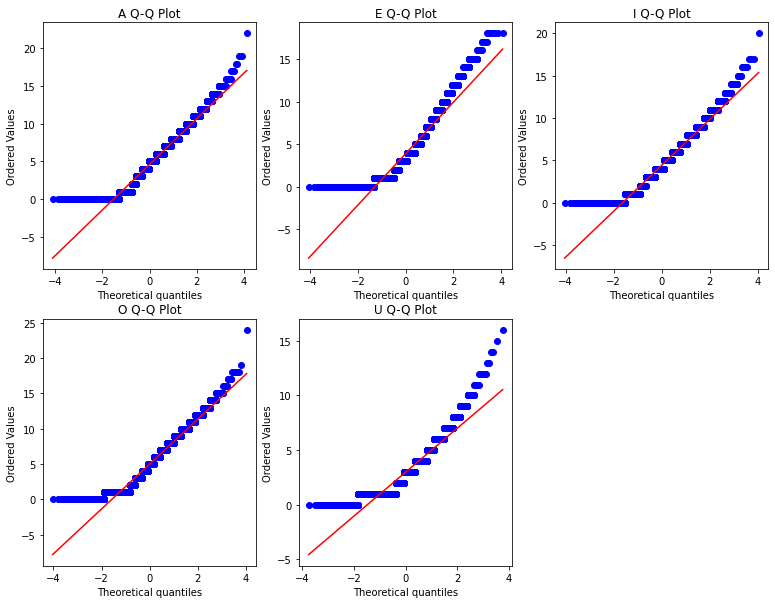

In [124]:
#Vowels Q-Q PLOT.

vowels=  ['a', 'e', 'i' ,'o', 'u']

fig =plt.figure(figsize=(13,10))
columns = 3
rows = 2
for i, j in enumerate (vowels):
    ax= fig.add_subplot(rows, columns, i+1)
    stats.probplot(df[j].Position, fit=True, plot=ax)
    ax.set_title(str(j).upper()+ ' Q-Q Plot')


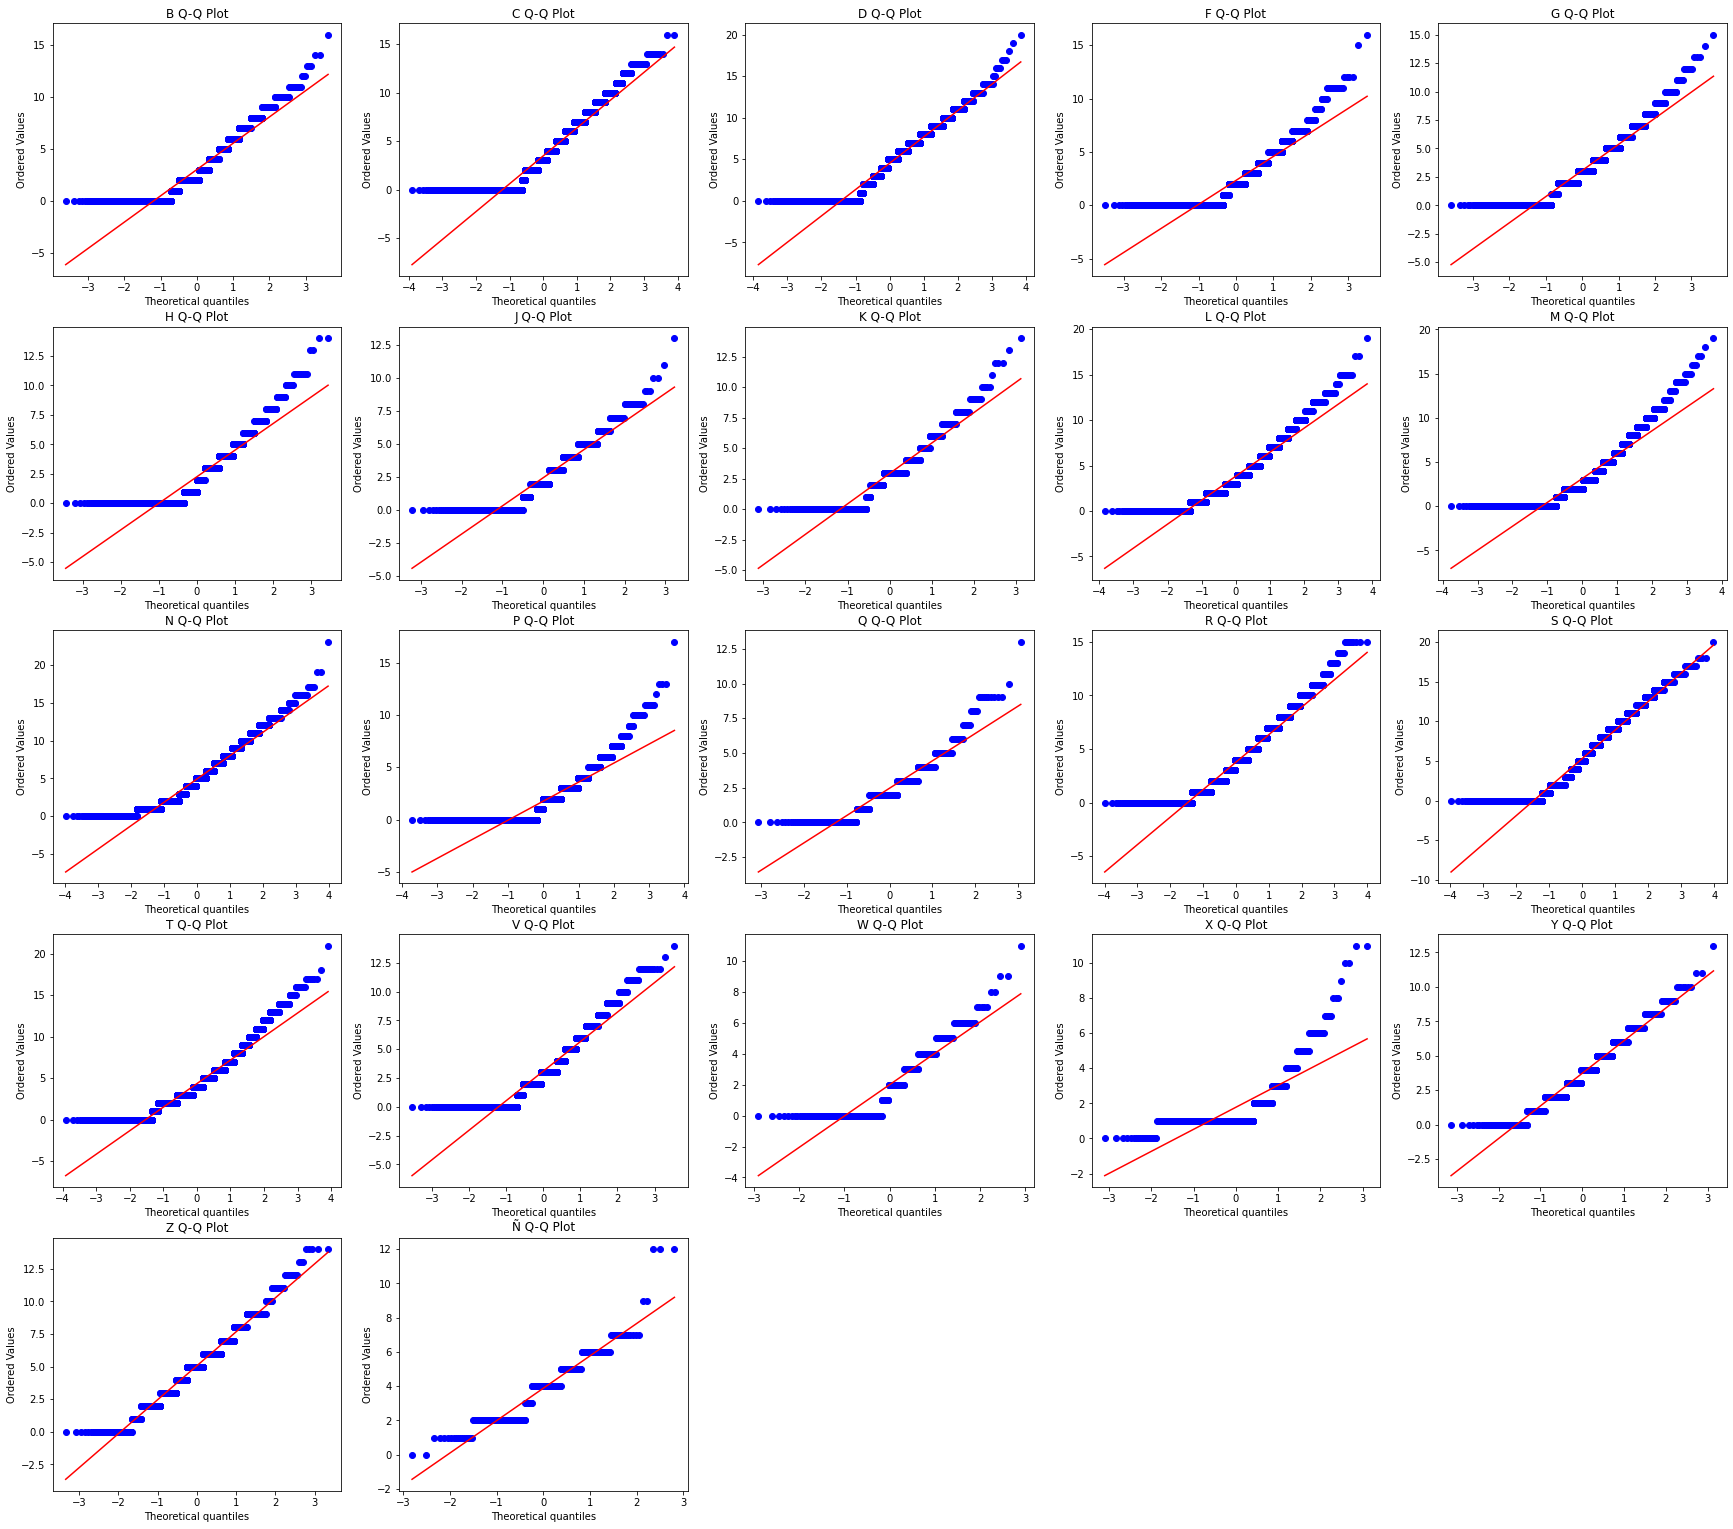

In [132]:
#Consonants Q-Q PLOT.

cons=  ['b', 'c', 'd', 'f', 'g', 'h', 'j', 'k', 'l', 'm', 'n', 'p', 'q',
       'r', 's', 't', 'v', 'w', 'x', 'y', 'z', 'ñ']

fig =plt.figure(figsize=(30,27))
columns = 5
rows = 5
for i, j in enumerate (cons):
    ax= fig.add_subplot(rows, columns, i+1)
    stats.probplot(df[j].Position, fit=True, plot=ax)
    ax.set_title(str(j).upper()+ ' Q-Q Plot')

In [73]:
#Getting consonants df
df_consonants = {}

for pos, name in enumerate(df_position_consonants['Letter'].unique()):

    consonants = df_position_consonants['Letter'].unique()
    df_consonants[name] = df_position_consonants.loc[df_position_consonants['Letter'] == consonants[pos]]
    

In [133]:
df_position_consonants

,Letter,Position
41694,b,0
199623,b,2
269379,b,0
208458,b,2
181991,b,0
...,...,...
141707,ñ,4
105318,ñ,4
12870,ñ,2
135154,ñ,3


In [127]:
df_position_consonants['Letter'].unique()

array(['b', 'c', 'd', 'f', 'g', 'h', 'j', 'k', 'l', 'm', 'n', 'p', 'q',
       'r', 's', 't', 'v', 'w', 'x', 'y', 'z', 'ñ'], dtype=object)